# Plot high temperature susceptibility data (Kappabridge X-T)

This notebook visualizes data from high-temperature experiments conducted on a Kappabridge instrument and exported to MagIC format.

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import rockmag as rmag
import pmagpy.contribution_builder as cb
import pmagpy.ipmag as ipmag

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import data

We can take the same approach as in the `rockmag_data_unpack.ipynb` notebook to bring the MagIC data into the notebook as a Contribution. To bring in a different contribution, set the directory path (currently `'./example_data/SSRM2022C'`) and the name of the file (currently `'SSRM2022C_IRMDB_export.txt'`) to be those relevant to your data.

**change the directory path and file name in the cell below to load your own data**


In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = './example_data/SSRM2022C'

# set the name of the MagIC file
ipmag.unpack_magic('SSRM2022C_IRMDB_export.txt', 
                     dir_path = dir_path,
                     input_dir_path = dir_path)

# create a contribution object from the tables in the directory
contribution = cb.Contribution(dir_path)
measurements = contribution.tables['measurements'].df
measurements.dropna(axis=1, how='all')

working on:  'contribution\r'
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/contribution.txt
  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/contribution.txt
working on:  'specimens\r'
46  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/specimens.txt
  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/specimens.txt
working on:  'samples\r'
16  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/samples.txt
  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/samples.txt
working on:  'sites\r'
5  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/sites.txt
  data put in  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/SSRM2022C/sites.txt
working on:  'locations\r'
5  records written to file  /Users/y

,dir_dec,dir_inc,experiment,instrument_codes,magn_mass,magn_moment,magn_x,magn_y,magn_z,meas_field_dc,meas_pos_z,meas_temp,measurement,method_codes,quality,sequence,specimen,standard,susc_chi_mass,timestamp,treat_ac_field,treat_dc_field,treat_dc_field_phi,treat_dc_field_theta,treat_step_num
measurement name,,,,,,,,,,,,,,,,,,,,,,,,,
DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,NaN,NaN,IRM-KappaF-LP-X-T-6829,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.9,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00,NaN,NaN,NaN,NaN,NaN
DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,NaN,NaN,IRM-KappaF-LP-X-T-6829,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.8,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00,NaN,NaN,NaN,NaN,NaN
DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,NaN,NaN,IRM-KappaF-LP-X-T-6829,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.5,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00,NaN,NaN,NaN,NaN,NaN
DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,NaN,NaN,IRM-KappaF-LP-X-T-6829,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.4,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00,NaN,NaN,NaN,NaN,NaN
DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,NaN,NaN,IRM-KappaF-LP-X-T-6829,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318.2,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan,89.287256,69.154282,DX1-4b-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,6.015930e-08,2.663010e-10,2.140620e-08,5.622140e-08,NaN,0.25,NaN,None,LP-AN-ARM,None,NaN,DX1-4b,None,NaN,2022:06:14:17:01:41.00,0.2,0.00000,0.0,0.0,NaN
nan,89.179101,-46.279529,DA4-1C-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,5.568630e-06,5.514000e-08,3.848310e-06,-4.024560e-06,NaN,0.05,NaN,None,LP-AN-ARM,None,NaN,DA4-1C,None,NaN,2022:06:14:17:09:04.00,0.2,0.00005,-45.0,90.0,NaN
nan,78.668498,-42.932098,DX1-4b-ARM_aniso-LP-AN-ARM-0,IRM-SRM-U,NaN,2.991990e-07,4.304250e-08,2.147920e-07,-2.037940e-07,NaN,0.25,NaN,None,LP-AN-ARM,None,NaN,DX1-4b,None,NaN,2022:06:14:17:09:25.00,0.2,0.00005,-45.0,90.0,NaN


## The project export contains data from all the experiments

- LP refers to lab protocol
- X-T refers to high-temperature susceptibility vs. temperature experiments done on the Kappabridge

In [3]:
measurements.method_codes.unique()

array(['LP-X-T', 'LP-HYS', 'LP-BCR-BF', 'LP-FORC', 'LP-DIR-AF',
       'LP-AN-ARM', 'LP-ARM-AFD'], dtype=object)

## Let's isolate the Kappabridge X-T data from your project export

In [4]:
# the .dropna(axis=1, how='all').reset_index(drop=1) code is used to remove columns that are all NaNs and reset the index
XT_measurements = measurements[measurements['method_codes']=='LP-X-T'].dropna(axis=1, how='all').reset_index(drop=1)
XT_measurements.head()

,experiment,meas_temp,measurement,method_codes,quality,sequence,specimen,standard,susc_chi_mass,timestamp
0,IRM-KappaF-LP-X-T-6829,298.9,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00
1,IRM-KappaF-LP-X-T-6829,302.8,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00
2,IRM-KappaF-LP-X-T-6829,307.5,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00
3,IRM-KappaF-LP-X-T-6829,312.4,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00
4,IRM-KappaF-LP-X-T-6829,318.2,DA4-r-IRM-KappaF-LP-X-T-6829-6829-32767,LP-X-T,g,32767.0,DA4-r,u,-0.000007,2022:06:08:14:04:23.00


## Now let's select a specimen and its X-T experiment of interest

- One could do multiple rounds of X-T experiments on the same specimen
- so choose in the `first dropdown menu` the specimen of interest
- the choose in the `second dropdown menu` the experiment of interest

In [5]:
# make two drop down ipywidgets for the user to select the sample and the associated experiment
specimen_dropdown = widgets.Dropdown(
    options=XT_measurements['specimen'].unique(),
    description='specimen:',
    disabled=False,
)

experiment_dropdown = widgets.Dropdown(
    options=XT_measurements['experiment'].unique(),
    description='Experiment:',
    disabled=False,
)
# make sure to set the default value of the experiment dropdown to the first experiment in the specimen dropdown
experiment_dropdown.options = XT_measurements[XT_measurements['specimen']==specimen_dropdown.value]['experiment'].unique()

# make sure to update the experiment dropdown based on the specimen selected
def update_experiment(*args):
    experiment_dropdown.options = XT_measurements[XT_measurements['specimen']==specimen_dropdown.value]['experiment'].unique()

specimen_dropdown.observe(update_experiment, 'value')

# display the dropdowns
display(specimen_dropdown, experiment_dropdown)


Dropdown(description='specimen:', options=('DA4-r', 'DX1-4r', 'DX1-4r2'), value='DA4-r')

Dropdown(description='Experiment:', options=('IRM-KappaF-LP-X-T-6829',), value='IRM-KappaF-LP-X-T-6829')

## Now let's plot the X-T data based on the selection of the previous cell

In [6]:
# define function for splitting the curves into warm and cool cycles
def split_warm_cool(experiment):
    Tlist = experiment['meas_temp'] # temperature list
    Xlist = experiment['susc_chi_mass'] # Chi list
    
    warmorcool = np.array(np.insert((np.diff(Tlist) > 0 )* 1, 0, 1))
#     print(warmorcool)
    warm_T = [Tlist[i] for i in range(len(warmorcool)) if warmorcool[i]==1]
    cool_T = [Tlist[i] for i in range(len(warmorcool)) if warmorcool[i]==0]
    warm_X = [Xlist[i] for i in range(len(warmorcool)) if warmorcool[i]==1]
    cool_X = [Xlist[i] for i in range(len(warmorcool)) if warmorcool[i]==0]

    return warm_T, warm_X, cool_T, cool_X

# define function for plotting the X-T curve
def plot_X_T(experiment):
    warm_T, warm_X, cool_T, cool_X = split_warm_cool(experiment)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(warm_T, warm_X, color='red', label='warm cycle')
    ax.plot(cool_T, cool_X, color='blue', label='cool cycle')
    ax.set_xlabel('Temperature (K)', fontsize=16)
    ax.set_ylabel('Susceptibility ($\chi$) (m$^3$/kg)', fontsize=16)
    ax.set_title('Susceptibility vs Temperature', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid()
    return ax

## plot the selected experiment data

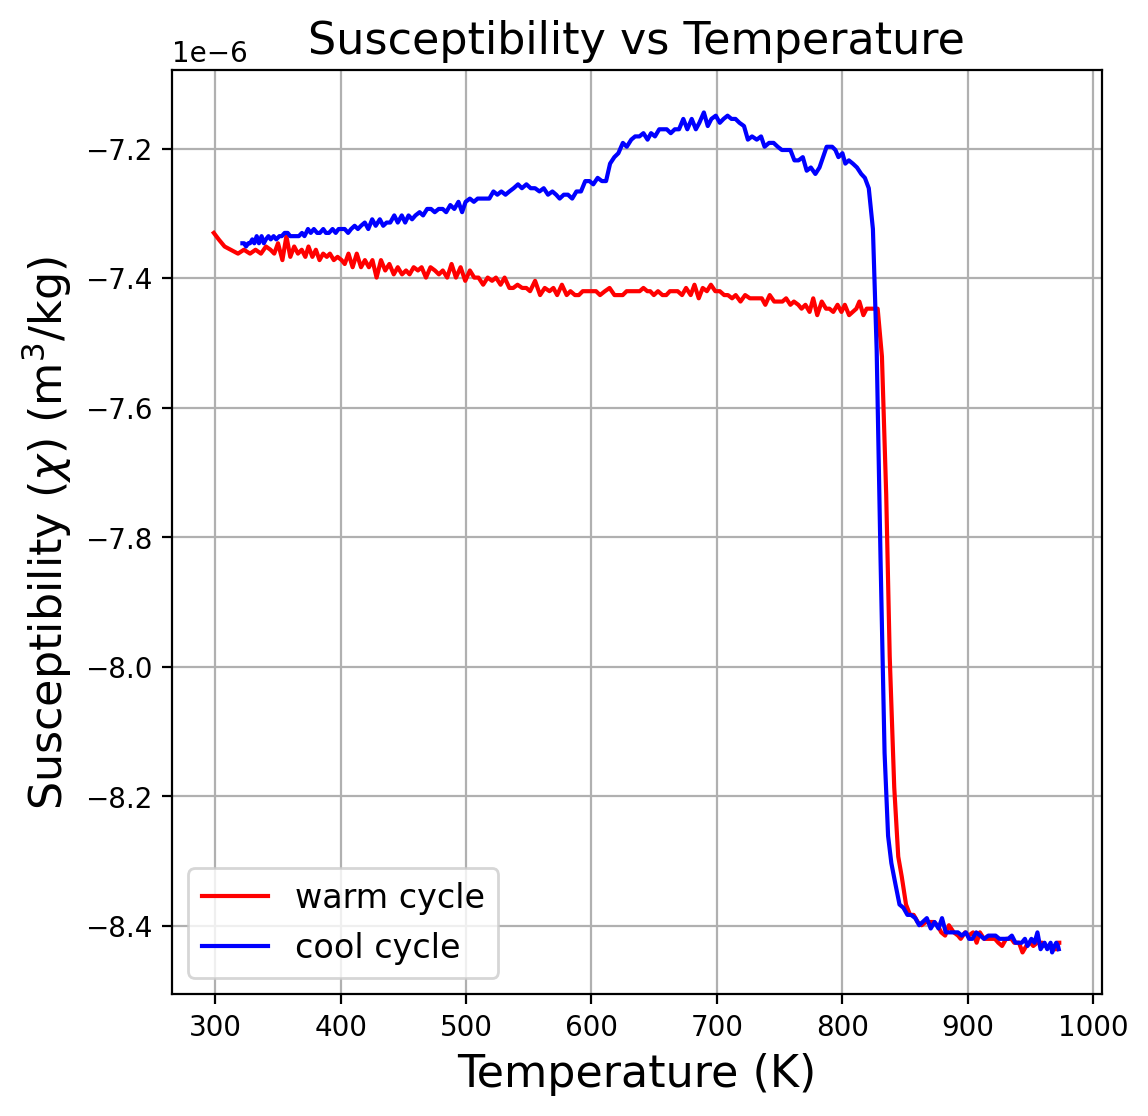

In [7]:
selected_experiment = XT_measurements[(XT_measurements['specimen']==specimen_dropdown.value) & 
                                      (XT_measurements['experiment']==experiment_dropdown.value)].reset_index(drop=1)


ax = plot_X_T(selected_experiment)
plt.show()


## save the data

- you can put the name of the file (including its directory relative to this notebook) in the text box below 
- the click the `Save data` button to save the data
- the available file formats for figures are: 

`eps`: 'Encapsulated Postscript', 

`jpg`: 'Joint Photographic Experts Group', 

`jpeg`: 'Joint Photographic Experts Group',

`pdf`: 'Portable Document Format', 

`pgf`: 'PGF code for LaTeX', 

`png`: 'Portable Network Graphics', 

`ps`: 'Postscript', 

`raw`: 'Raw RGBA bitmap', 

`rgba`: 'Raw RGBA bitmap', 

`svg`: 'Scalable Vector Graphics', 

`svgz`: 'Scalable Vector Graphics', 

`tif`: 'Tagged Image File Format'

`tiff`: 'Tagged Image File Format'

**but just do pdf, png, or jpg**

In [8]:
# now let's make an ipywitgets text box and a button for saving the plot to a given directory and file name 
output_text = widgets.Text(
    value='output.png',
    placeholder='output.png',
    description='Output file:',
    disabled=False
)

save_button = widgets.Button(
    description='Save Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Save the plot',
    icon='save' # (FontAwesome names without the `fa-` prefix)
)

out = widgets.Output()
def save_plot(b):
    with out:
        out.clear_output(wait=True)
    ax = plot_X_T(selected_experiment)
    plt.savefig(output_text.value)
    plt.show()
    
save_button.on_click(save_plot)

display(output_text, save_button)



Text(value='output.png', description='Output file:', placeholder='output.png')

Button(description='Save Plot', icon='save', style=ButtonStyle(), tooltip='Save the plot')